In [2]:
# mount the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# install kaggle
!pip install -q kaggle

In [4]:
# configure the kaggle API access
# create a directory for kaggle in the Colab environment
# copy the kaggle.json file from the Google Drive
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/

In [5]:
# set permission to the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
# download the dataset using the kaggle API command
!kaggle datasets download tanshihjen/octdl-oct-dataset

Dataset URL: https://www.kaggle.com/datasets/tanshihjen/octdl-oct-dataset
License(s): unknown
 97% 369M/380M [00:04<00:00, 105MB/s]
100% 380M/380M [00:04<00:00, 89.5MB/s]


In [7]:
# unzip the download dataset
!unzip octdl-oct-dataset.zip

Archive:  octdl-oct-dataset.zip
  inflating: OCTDL/AMD/amd_1047099_1.jpg  
  inflating: OCTDL/AMD/amd_1047099_2.jpg  
  inflating: OCTDL/AMD/amd_1047099_3.jpg  
  inflating: OCTDL/AMD/amd_1047099_4.jpg  
  inflating: OCTDL/AMD/amd_1084498_1.jpg  
  inflating: OCTDL/AMD/amd_1084498_2.jpg  
  inflating: OCTDL/AMD/amd_1084498_3.jpg  
  inflating: OCTDL/AMD/amd_1096590_1.jpg  
  inflating: OCTDL/AMD/amd_1096590_2.jpg  
  inflating: OCTDL/AMD/amd_1096590_3.jpg  
  inflating: OCTDL/AMD/amd_1096590_4.jpg  
  inflating: OCTDL/AMD/amd_1096590_5.jpg  
  inflating: OCTDL/AMD/amd_1101816_1.jpg  
  inflating: OCTDL/AMD/amd_1101816_2.jpg  
  inflating: OCTDL/AMD/amd_1101816_3.jpg  
  inflating: OCTDL/AMD/amd_1101816_4.jpg  
  inflating: OCTDL/AMD/amd_1131743_1.jpg  
  inflating: OCTDL/AMD/amd_1163930_1.jpg  
  inflating: OCTDL/AMD/amd_1163930_2.jpg  
  inflating: OCTDL/AMD/amd_1163930_3.jpg  
  inflating: OCTDL/AMD/amd_1168623_1.jpg  
  inflating: OCTDL/AMD/amd_1168623_2.jpg  
  inflating: OCTDL/AMD

In [8]:
# import essential libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow import keras
from keras import models, layers

In [9]:
# learning history for the fine-tuned models
history_enetv2m = pd.read_csv('/content/drive/MyDrive/learning_history/oct_enetv2m_sp_151124.csv')
history_enetv2m_cw = pd.read_csv('/content/drive/MyDrive/learning_history/oct_enetv2m_sp_cw_151124.csv')

In [10]:
# helper function to plot the learning curves
def plot_learning_curves(df):
  plt.figure(figsize=(12,5))
  plt.subplot(1,2,1)
  plt.plot(df['categorical_accuracy'], label='Training')
  plt.plot(df['val_categorical_accuracy'], label='Validation')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.title('Accuracy')
  plt.grid(alpha=0.4)
  plt.legend(loc='lower right')

  plt.subplot(1,2,2)
  plt.plot(df['loss'], label='Training')
  plt.plot(df['val_loss'], label='Validation')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Loss')
  plt.grid(alpha=0.4)
  plt.legend(loc='upper right')

  plt.tight_layout()
  plt.show()

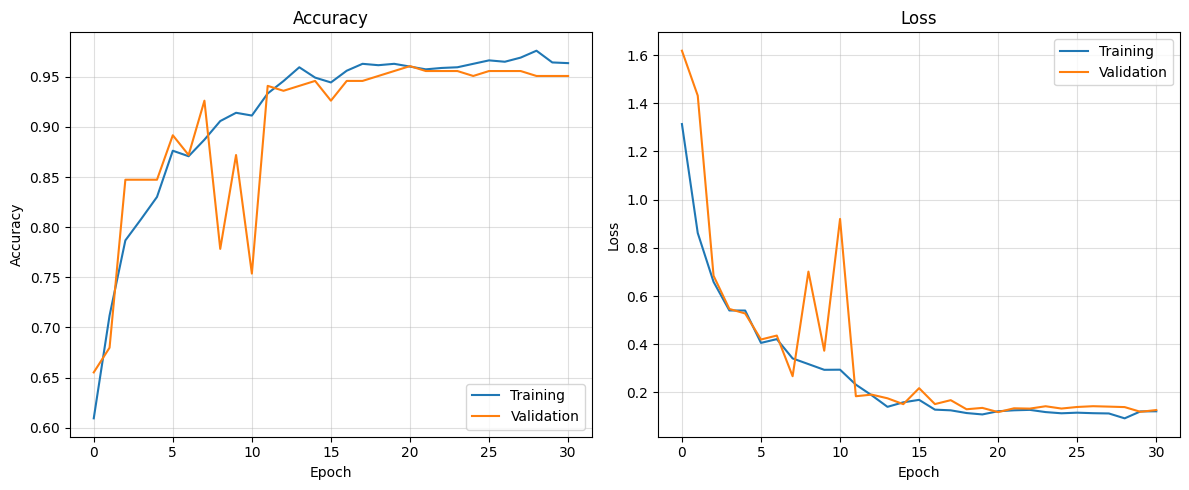

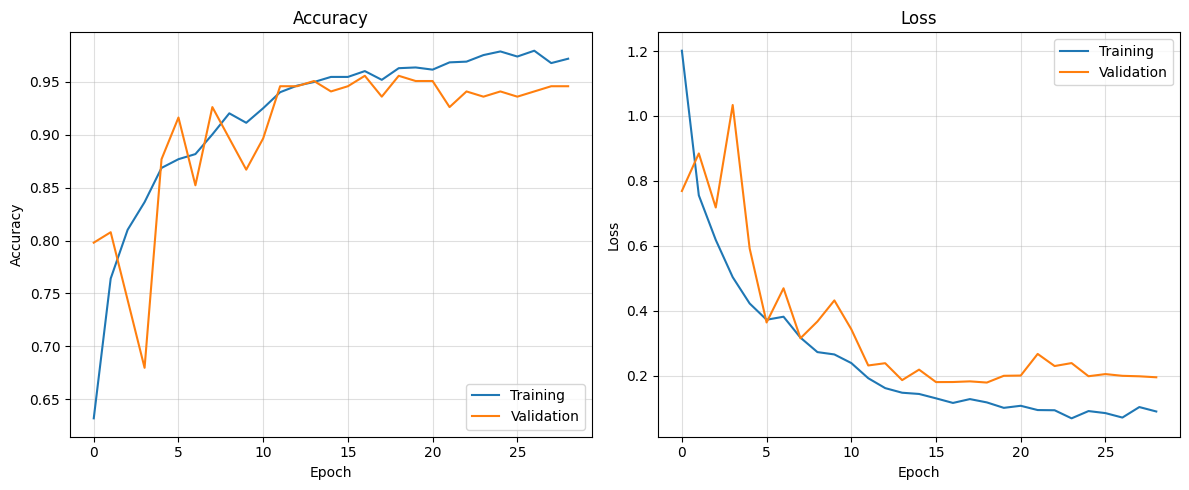

In [11]:
plot_learning_curves(history_enetv2m)
plot_learning_curves(history_enetv2m_cw)

In [12]:
# import the test dataset
test_df = pd.read_csv('/content/drive/MyDrive/dataset/oct_test.csv')

In [13]:
# prepare the test dataset to be passed into the model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(preprocessing_function=None)

test_ds = test_datagen.flow_from_dataframe(
    directory = None,
    dataframe = test_df,
    x_col = 'Path',
    y_col = 'Label',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = False
)

Found 407 validated image filenames belonging to 7 classes.


In [14]:
# list of the labels in the dataset
labels = list(test_ds.class_indices.keys())
print(labels)

label_map = dict(zip(test_ds.class_indices.values(), test_ds.class_indices.keys()))
print(label_map)

['AMD', 'DME', 'ERM', 'NO', 'RAO', 'RVO', 'VID']
{0: 'AMD', 1: 'DME', 2: 'ERM', 3: 'NO', 4: 'RAO', 5: 'RVO', 6: 'VID'}


In [15]:
# load the fine-tuned models
enetv2m = keras.models.load_model('/content/drive/MyDrive/models/oct_enetv2m_sp_151124.keras')
enetv2m_cw = keras.models.load_model('/content/drive/MyDrive/models/oct_enetv2m_sp_cw_151124.keras')

trained_models = [enetv2m, enetv2m_cw]
model_list = ['Model 1', 'Model 2']

In [16]:
# summary of the loaded fine-tuned models
enetv2m.summary()
enetv2m_cw.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-m (Functional)        │ (None, 1280)                │      53,150,388 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 1280)                │           5,120 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 159,962,547 (610.21 MB)

 Trainable params: 53,222,651 (203.03 MB)

 Non-trainable params: 294,592 (1.12 MB)

 Optimizer params: 106,445,304 (406.06 MB)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-m (Functional)        │ (None, 1280)                │      53,150,388 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1280)                │           5,120 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 159,962,547 (610.21 MB)

 Trainable params: 53,222,651 (203.03 MB)

 Non-trainable params: 294,592 (1.12 MB)

 Optimizer params: 106,445,304 (406.06 MB)

In [17]:
# helper function to calculate some key metrics and plotting figures
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve, precision_recall_curve

# helper function to calculate the auc, fpr, tpr, precision, recall for a given model
def calculate_metrics(model, ytrue, ytrue_onehot, ypred_proba, labels):

    auc_scores = {}
    ap_score = {}
    fpr = {}
    tpr = {}
    precision = {}
    recall = {}

    for i, label in zip(range(len(labels)), labels):

      # AUC score for each class
      auc = roc_auc_score(ytrue_onehot[:, i], ypred_proba[:, i])
      auc_scores[label] = auc

      # average precision score for each class
      ap = average_precision_score(ytrue_onehot[:,i], ypred_proba[:,i])
      ap_score[label] = ap

      # TPR, FPR for each class
      fpr[i], tpr[i], _ = roc_curve(ytrue_onehot[:,i], ypred_proba[:,i])

      # precision, recall for each class
      precision[i], recall[i], _ = precision_recall_curve(ytrue_onehot[:,i], ypred_proba[:,i])

    return auc_scores, ap_score, fpr, tpr, precision, recall

# helper function to plot the ROC curve
def plot_roc(ax, fpr, tpr, labels, auc, model):
  ax.plot(fpr, tpr, linestyle='--', linewidth=2, label=f'{model}:{round(auc[labels],4)}')
  ax.plot([0, 1], [0, 1], linestyle='-', color='gray')
  ax.set_xlim([-0.05, 1.0])
  ax.set_ylim([0.0, 1.05])
  ax.set_xlabel('False Positive Rate')
  ax.set_ylabel('True Positive Rate')
  ax.legend(loc='lower right', title='AUC')
  ax.grid(alpha=0.6)
  ax.set_title(labels)

# helper function to plot the precision-recall curve
def plot_pr_curve(ax, precision, recall, labels, ap, model):
  ax.plot(recall, precision, linestyle='--', linewidth=2, label=f'{model}:{round(ap[labels],4)}')
  ax.set_xlim([-0.05, 1.05])
  ax.set_ylim([0.0, 1.05])
  ax.set_xlabel('Recall')
  ax.set_ylabel('Precision')
  ax.legend(loc='lower right', title='Average Precision')
  ax.grid(alpha=0.6)
  ax.set_title(labels)

In [18]:
# accuracy of the fine-tuned models on test dataset
enetv2m_acc = enetv2m.evaluate(test_ds)[1]
enetv2m_cw_acc = enetv2m_cw.evaluate(test_ds)[1]

print('Accuracy on Test Data (model: enetv2m):', round(enetv2m_acc,4)*100,'%')
print('Accuracy on Test Data (model: enetv2m_cw):', round(enetv2m_cw_acc,4)*100,'%')

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 201s 14s/step - auc: 0.9950 - categorical_accuracy: 0.9169 - loss: 0.2289 - precision: 0.9297 - recall: 0.9049
13/13 ━━━━━━━━━━━━━━━━━━━━ 200s 14s/step - auc: 0.9862 - categorical_accuracy: 0.8996 - loss: 0.3220 - precision: 0.9259 - recall: 0.8817
Accuracy on Test Data (model: enetv2m): 90.91 %
Accuracy on Test Data (model: enetv2m_cw): 90.42 %


In [19]:
# predicted class & prediction probabilities by each model
ypred_proba_enetv2m = enetv2m.predict(test_ds)
ypred_enetv2m = np.argmax(ypred_proba_enetv2m, axis=1)

ypred_proba_enetv2m_cw = enetv2m_cw.predict(test_ds)
ypred_enetv2m_cw = np.argmax(ypred_proba_enetv2m_cw, axis=1)

# store the result in lists
ypred_list = [ypred_enetv2m, ypred_enetv2m_cw]
ypred_proba_list = [ypred_proba_enetv2m, ypred_proba_enetv2m_cw]

13/13 ━━━━━━━━━━━━━━━━━━━━ 203s 15s/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 203s 15s/step


In [20]:
from sklearn.preprocessing import LabelBinarizer

# encode the ytrue into one hot encoding format
lb = LabelBinarizer()
ytrue_onehot = lb.fit_transform(test_ds.classes)

In [21]:
# get the list of metrics for each class predicted by different models
auc_list = []
ap_list = []
fpr_list = []
tpr_list = []
precision_list = []
recall_list = []

for model, model_name, ypred_proba in zip(trained_models, model_list, ypred_proba_list):
  auc, ap, fpr, tpr, precision, recall = calculate_metrics(model, test_ds.classes, ytrue_onehot, ypred_proba, labels)
  auc_list.append(auc)
  ap_list.append(ap)
  fpr_list.append(fpr)
  tpr_list.append(tpr)
  precision_list.append(precision)
  recall_list.append(recall)

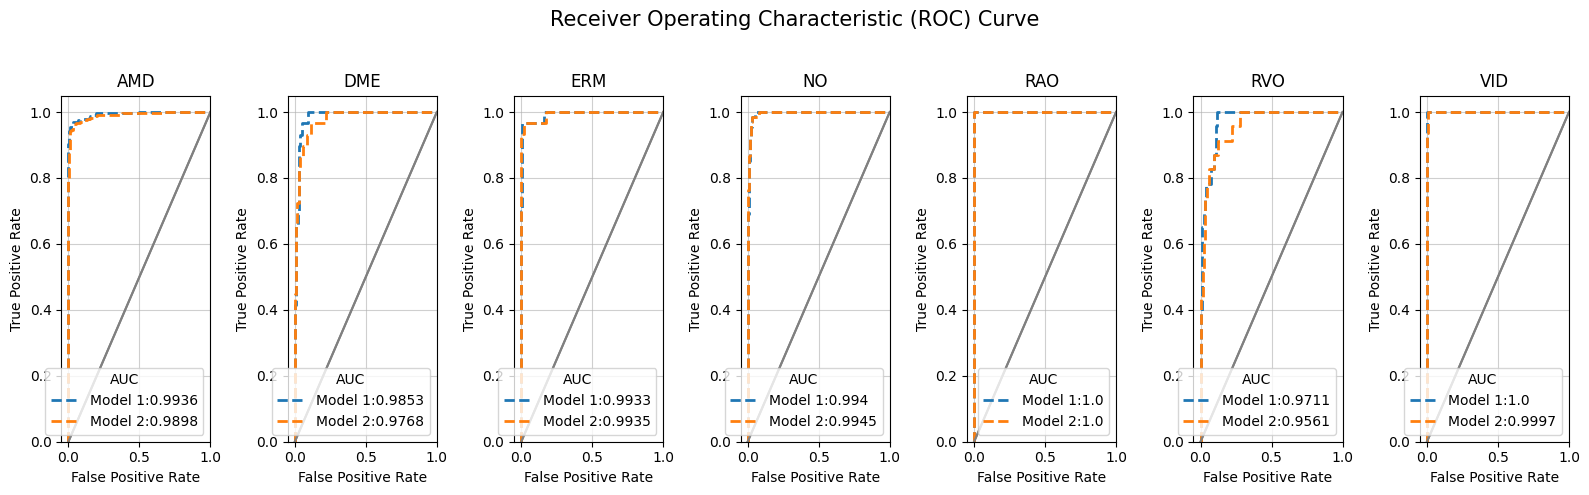

In [31]:
# ROC curve
fig, axes = plt.subplots(1, 7, figsize=(16, 5))
for j in range(len(fpr_list)):
  for i in range(7):
    plot_roc(axes[i], fpr_list[j][i], tpr_list[j][i], labels[i], auc_list[j], model_list[j])


fig.suptitle('Receiver Operating Characteristic (ROC) Curve\n', fontsize=15)
plt.tight_layout()
plt.show()

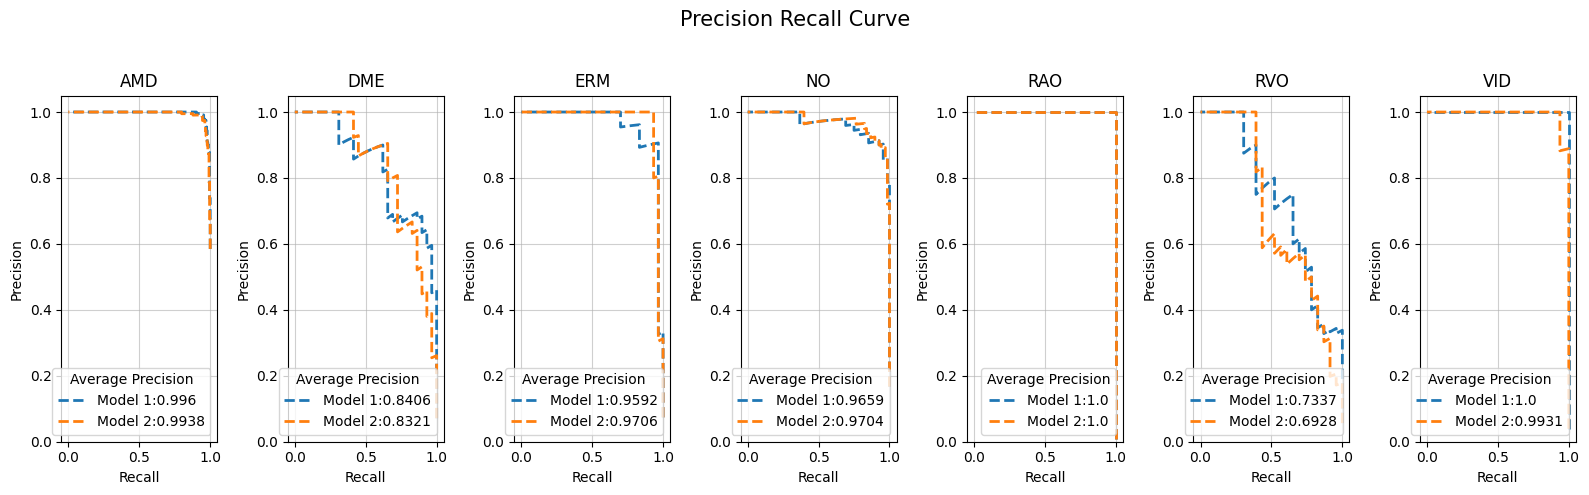

In [32]:
# precision-recall curve
fig, axes = plt.subplots(1, 7, figsize=(16, 5))
for j in range(len(fpr_list)):
  for i in range(7):
    plot_pr_curve(axes[i], precision_list[j][i], recall_list[j][i], labels[i], ap_list[j], model_list[j])


fig.suptitle('Precision Recall Curve\n', fontsize=15)
plt.tight_layout()
plt.show()

In [33]:
# export the AUC of both models on each class in csv format
auc_df = pd.DataFrame({'enetv2m':auc_list[0], 'enetv2m_cw':auc_list[1]}).T
auc_df.to_csv('/content/drive/MyDrive/export_data/oct_auc_df.csv')
display(auc_df)

# export the average precision of both models on each class in csv format
ap_df = pd.DataFrame({'enetv2m':ap_list[0], 'enetv2m_cw':ap_list[1]}).T
ap_df.to_csv('/content/drive/MyDrive/export_data/oct_ap_df.csv')
display(ap_df)

,AMD,DME,ERM,NO,RAO,RVO,VID
enetv2m,0.993561,0.985313,0.993280,0.993970,1.0,0.971128,1.00000
enetv2m_cw,0.989831,0.976829,0.993546,0.994534,1.0,0.956069,0.99968


,AMD,DME,ERM,NO,RAO,RVO,VID
enetv2m,0.996004,0.840583,0.959192,0.965852,1.0,0.733686,1.000000
enetv2m_cw,0.993770,0.832148,0.970602,0.970424,1.0,0.692782,0.993056


In [34]:
# error analysis
prediction_table = test_df.copy()

# insert new columns with the predictions by 2 models
prediction_table['Model1_Prediction'] = ypred_enetv2m
prediction_table['Model2_Prediction'] = ypred_enetv2m_cw

prediction_table['Model1_Prediction'] = prediction_table['Model1_Prediction'].map(label_map)
prediction_table['Model2_Prediction'] = prediction_table['Model2_Prediction'].map(label_map)

# display the prediction_table
display(prediction_table)

# save the prediciton table in csv file
prediction_table.to_csv('/content/drive/MyDrive/export_data/oct_prediction_table.csv', index=False)

,Path,Label,Model1_Prediction,Model2_Prediction
0,/content/OCTDL/NO/no_9663705_1.jpg,NO,NO,NO
1,/content/OCTDL/NO/no_6757381_4.jpg,NO,NO,NO
2,/content/OCTDL/NO/no_3211291_1.jpg,NO,NO,ERM
3,/content/OCTDL/NO/no_5232582_2.jpg,NO,NO,NO
4,/content/OCTDL/NO/no_5232582_3.jpg,NO,NO,NO
...,...,...,...,...
402,/content/OCTDL/ERM/erm_7123170_4.jpg,ERM,ERM,ERM
403,/content/OCTDL/ERM/erm_4523545_2.jpg,ERM,ERM,ERM
404,/content/OCTDL/ERM/erm_4864500_1.jpg,ERM,ERM,DME
405,/content/OCTDL/ERM/erm_5438495_2.jpg,ERM,ERM,ERM


In [75]:
# helper function to count the correct & incorrect predictions by each model
def pred_stat(model_prediction):
  res = []
  total_count = prediction_table['Label'].value_counts()
  for label in prediction_table['Label'].unique():
    count = total_count[total_count.index==label]
    predictions = prediction_table[prediction_table['Label']==label][model_prediction].value_counts()
    total_predicted = np.sum(predictions.values)
    correct = predictions[predictions.index==label].values[0]
    incorrect = total_predicted - correct
    res.append([label, total_predicted, correct, incorrect])
  return pd.DataFrame(res, columns=['Class','Total_Prediction','Correct','Incorrect'])

# correct & incorrect predictions by each model
model1_stat = pred_stat('Model1_Prediction')
model2_stat = pred_stat('Model2_Prediction')

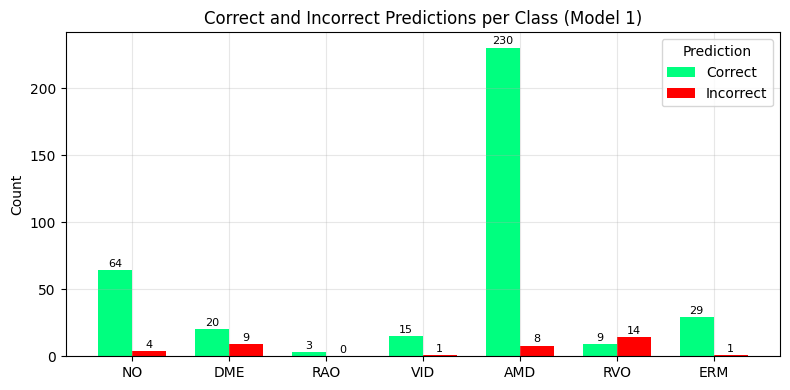

In [96]:
# data
classes = model1_stat['Class']
correct = model1_stat['Correct']
incorrect = model1_stat['Incorrect']

# bar positions
x = np.arange(len(classes))
width = 0.35  # Bar width

fig, ax = plt.subplots(figsize=(8, 4))
bars1 = ax.bar(x - width / 2, correct, width, label='Correct', color='springgreen')
bars2 = ax.bar(x + width / 2, incorrect, width, label='Incorrect', color='red')

# Add values on top of bars
for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 1, str(yval), ha='center', va='bottom', fontsize=8)

for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 1, str(yval), ha='center', va='bottom', fontsize=8)

ax.set_ylabel('Count')
ax.set_title('Correct and Incorrect Predictions per Class (Model 1)')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend(title='Prediction')

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

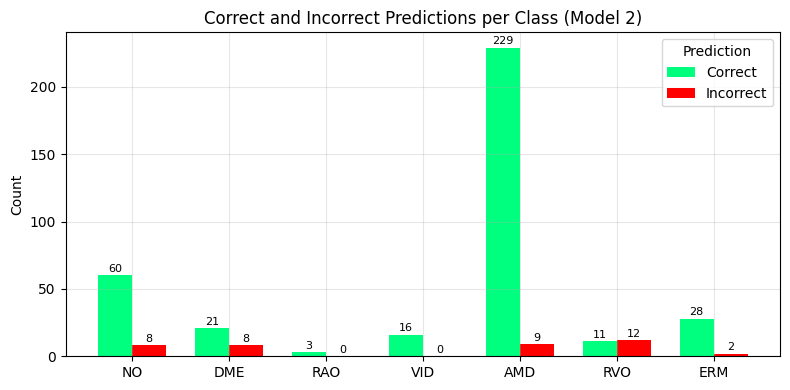

In [97]:
# data
classes = model2_stat['Class']
correct = model2_stat['Correct']
incorrect = model2_stat['Incorrect']

# bar positions
x = np.arange(len(classes))
width = 0.35  # Bar width

fig, ax = plt.subplots(figsize=(8, 4))
bars1 = ax.bar(x - width / 2, correct, width, label='Correct', color='springgreen')
bars2 = ax.bar(x + width / 2, incorrect, width, label='Incorrect', color='red')

# Add values on top of bars
for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 1, str(yval), ha='center', va='bottom', fontsize=8)

for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 1, str(yval), ha='center', va='bottom', fontsize=8)

ax.set_ylabel('Count')
ax.set_title('Correct and Incorrect Predictions per Class (Model 2)')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend(title='Prediction')

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [35]:
# error analysis
both_correct = []
either_correct = []
both_wrong = []
enetv2m_correct = []
enetv2m_cw_correct = []

for index, row in prediction_table.iterrows():
  if row['Label'] == row['Model1_Prediction'] == row['Model2_Prediction']:
    both_correct.append(index)
  if row['Label'] != row['Model1_Prediction'] and row['Label'] != row['Model2_Prediction']:
    both_wrong.append(index)
  if row['Label'] == row['Model1_Prediction'] or row['Label'] == row['Model2_Prediction']:
    either_correct.append(index)
  if row['Label'] == row['Model1_Prediction']:
    enetv2m_correct.append(index)
  if row['Label'] == row['Model2_Prediction']:
    enetv2m_cw_correct.append(index)

print('Total number of images in the test dataset:', prediction_table.shape[0])
print('Total number of images in the test dataset correctly classified by both models:', len(both_correct))
print('Total number of images in the test dataset correctly classified by either one of the models:', len(either_correct))
print('Total number of images in the test dataset misclassified by both models:', len(both_wrong))
print('Total number of images in the test dataset correctly classified by model (enetv2m):', len(enetv2m_correct))
print('Total number of images in the test dataset correctly classified by model (enetv2m_cw):', len(enetv2m_cw_correct))

Total number of images in the test dataset: 407
Total number of images in the test dataset correctly classified by both models: 359
Total number of images in the test dataset correctly classified by either one of the models: 379
Total number of images in the test dataset misclassified by both models: 28
Total number of images in the test dataset correctly classified by model (enetv2m): 370
Total number of images in the test dataset correctly classified by model (enetv2m_cw): 368


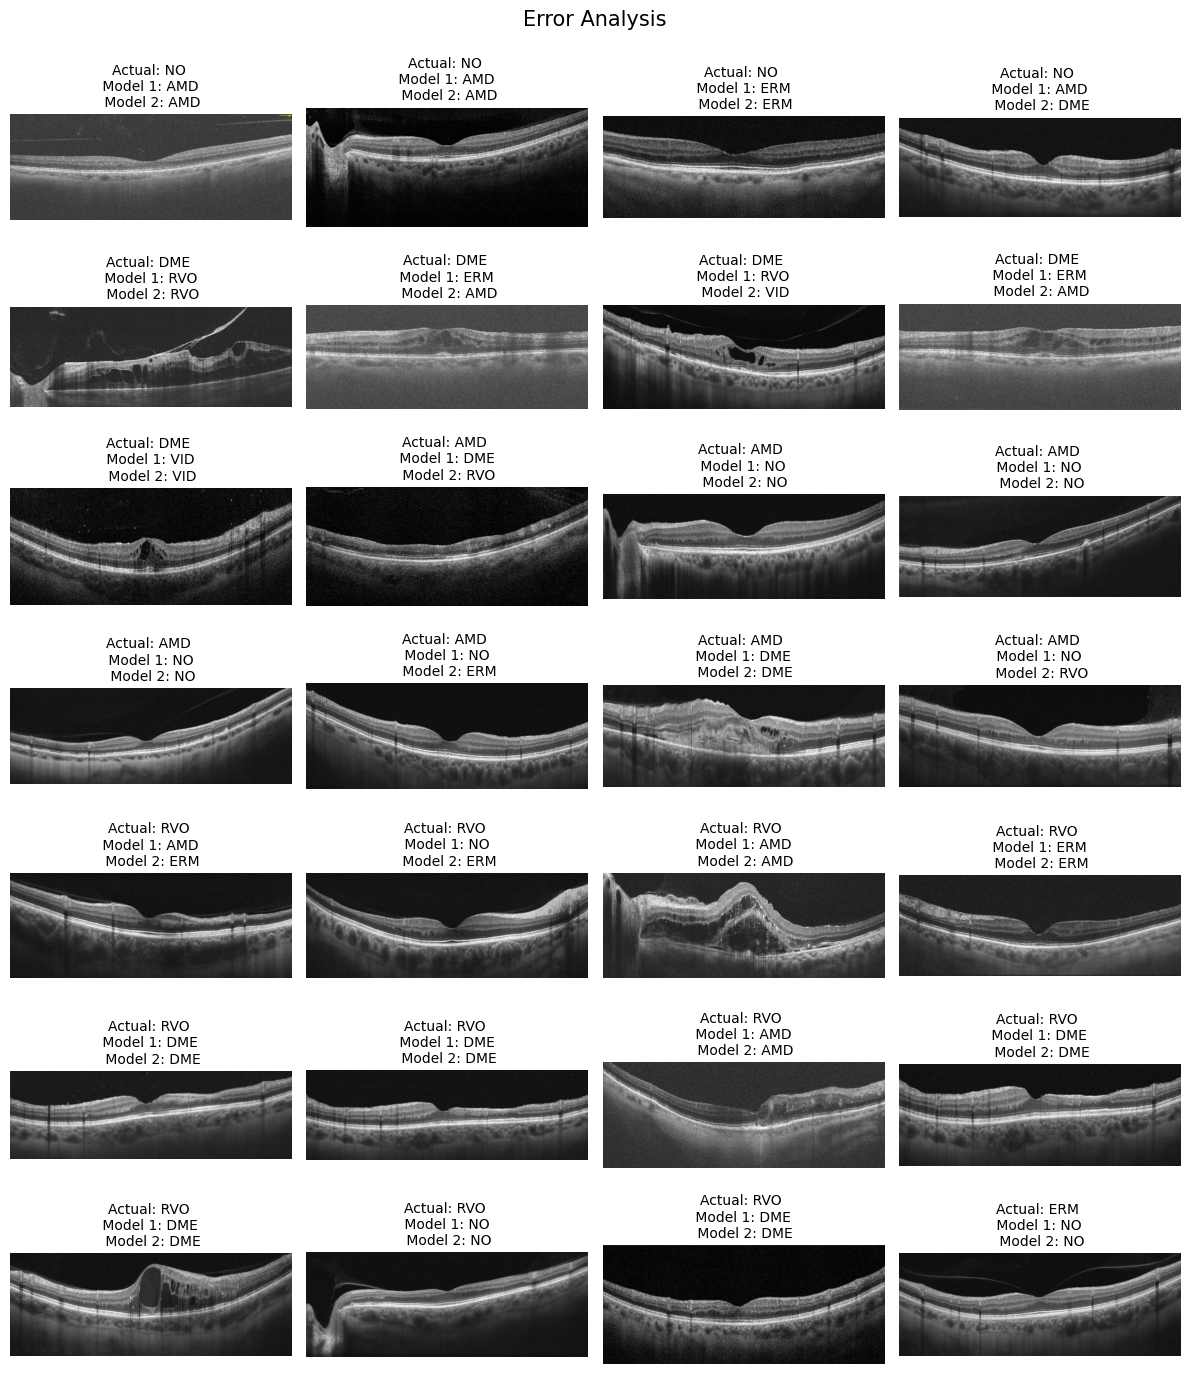

In [38]:
# visualize the images in the test dataset which failed to classify by both models
figure, axs = plt.subplots(7,4, figsize=(12,14))
axs = axs.ravel()

for i, index in zip(range(len(both_wrong)), both_wrong):
  axs[i].imshow(plt.imread(prediction_table['Path'][index]))
  axs[i].set_title('Actual: {} \n Model 1: {} \n Model 2: {}'.format(prediction_table['Label'][index], prediction_table['Model1_Prediction'][index], prediction_table['Model2_Prediction'][index]), fontsize=10)
  axs[i].axis('off')

for j in range(len(both_wrong), len(axs)):
    axs[j].axis('off')

#plt.suptitle('Images in Test Data Failed to Classify by All Models', fontsize=14)
figure.suptitle('Error Analysis\n', fontsize=15)
plt.subplots_adjust(hspace=2.0, wspace=0.5)
plt.tight_layout()
plt.show()

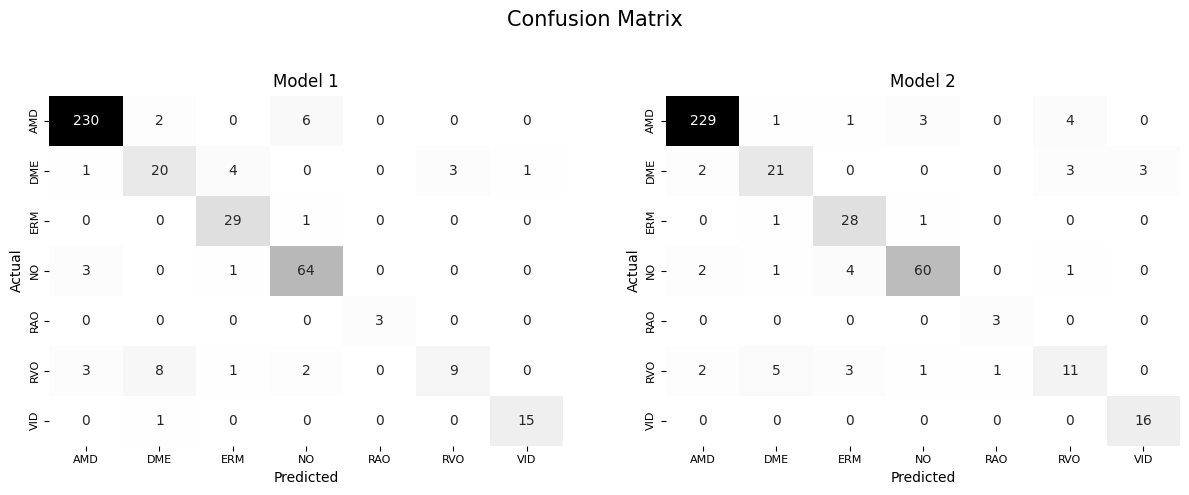

In [40]:
# confusion matrix
from sklearn.metrics import confusion_matrix

cm_enetv2m = confusion_matrix(test_ds.classes, ypred_enetv2m, labels=list(test_ds.class_indices.values()))
cm_enetv2m_cw = confusion_matrix(test_ds.classes, ypred_enetv2m_cw, labels=list(test_ds.class_indices.values()))

figure, axes = plt.subplots(1,2, figsize=(12,5))

sns.heatmap(cm_enetv2m, annot=True, cmap='binary', cbar=False, fmt='.4g', xticklabels=list(test_ds.class_indices.keys()), yticklabels=list(test_ds.class_indices.keys()), ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Model 1')
axes[0].tick_params(axis='x', labelsize=8)
axes[0].tick_params(axis='y', labelsize=8)

sns.heatmap(cm_enetv2m_cw, annot=True, cmap='binary', cbar=False, fmt='.4g', xticklabels=list(test_ds.class_indices.keys()), yticklabels=list(test_ds.class_indices.keys()), ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('Model 2')
axes[1].tick_params(axis='x', labelsize=8)
axes[1].tick_params(axis='y', labelsize=8)

figure.suptitle('Confusion Matrix\n', fontsize=15)
plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.2)
plt.show()

In [29]:
# classification report
from sklearn.metrics import classification_report

enetv2m_report = classification_report(test_ds.classes, ypred_enetv2m, target_names=labels, output_dict=True)
enetv2m_cw_report = classification_report(test_ds.classes, ypred_enetv2m_cw, target_names=labels, output_dict=True)

# convert the classification report into dataframe format
enetv2m_report = pd.DataFrame(enetv2m_report).T
enetv2m_cw_report = pd.DataFrame(enetv2m_cw_report).T

# display the classification report
print('Classification Report for Model enetv2m:')
display(enetv2m_report)
print('\nClassification Report for Model enetv2m_cw:')
display(enetv2m_cw_report)

# export the classification report in csv format
enetv2m_report.to_csv('/content/drive/MyDrive/export_data/oct_enetv2m_classification_report.csv')
enetv2m_cw_report.to_csv('/content/drive/MyDrive/export_data/oct_enetv2m_cw_classification_report.csv')

Classification Report for Model enetv2m:


,precision,recall,f1-score,support
AMD,0.970464,0.966387,0.968421,238.000000
DME,0.645161,0.689655,0.666667,29.000000
ERM,0.828571,0.966667,0.892308,30.000000
NO,0.876712,0.941176,0.907801,68.000000
RAO,1.000000,1.000000,1.000000,3.000000
RVO,0.750000,0.391304,0.514286,23.000000
VID,0.937500,0.937500,0.937500,16.000000
accuracy,0.909091,0.909091,0.909091,0.909091
macro avg,0.858344,0.841813,0.840998,407.000000
weighted avg,0.907626,0.909091,0.904535,407.000000



Classification Report for Model enetv2m_cw:


,precision,recall,f1-score,support
AMD,0.974468,0.962185,0.968288,238.000000
DME,0.724138,0.724138,0.724138,29.000000
ERM,0.777778,0.933333,0.848485,30.000000
NO,0.923077,0.882353,0.902256,68.000000
RAO,0.750000,1.000000,0.857143,3.000000
RVO,0.578947,0.478261,0.523810,23.000000
VID,0.842105,1.000000,0.914286,16.000000
accuracy,0.904177,0.904177,0.904177,0.904177
macro avg,0.795788,0.854324,0.819772,407.000000
weighted avg,0.904338,0.904177,0.902968,407.000000
